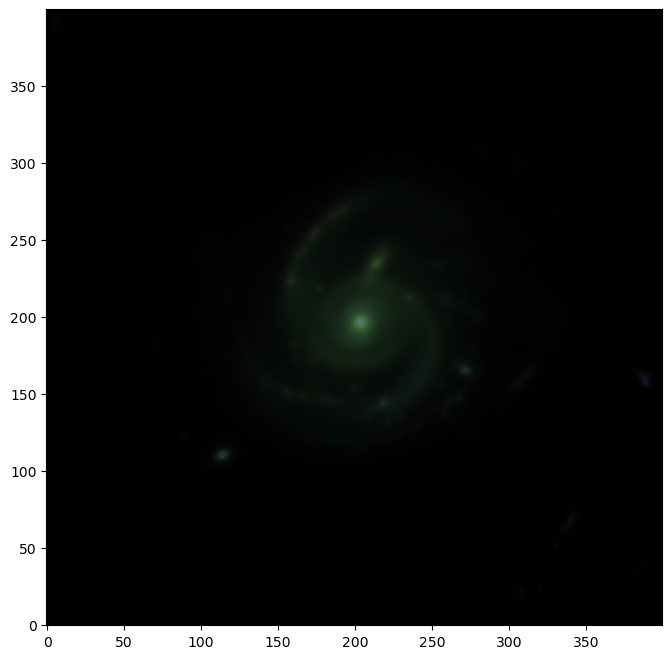

In [27]:
import warnings
from pathlib import Path

import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.visualization import make_lupton_rgb
from astropy.wcs import WCS, FITSFixedWarning


def load_and_cutout(band_name, coord, size):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FITSFixedWarning)
        with fits.open(
            Path(Path.cwd()) / f"data/HST_JWST/jwst_{band_name}_crop.fits"
        ) as hdu:
            wcs = WCS(hdu[0].header)
            cutout = Cutout2D(data=hdu[0].data, position=coord, size=size, wcs=wcs)
    return cutout


coord = [1110, 980]
f150w = load_and_cutout("f150W", coord=coord, size=12 * u.arcsec)
f277w = load_and_cutout("f277W", coord=coord, size=12 * u.arcsec)
f444w = load_and_cutout("f444W", coord=coord, size=12 * u.arcsec)

rgb_image = make_lupton_rgb(f444w.data, f277w.data, f150w.data)  # RGB

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(rgb_image, origin="lower")
fig.savefig(Path(Path.cwd()) / f"output/1mage-jwst-color-1.pdf")

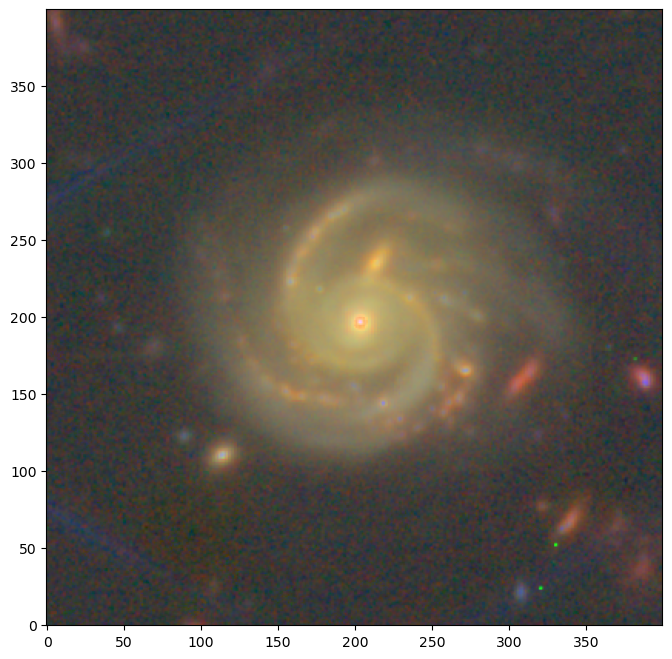

In [28]:
rgb_image = make_lupton_rgb(
    2 * f444w.data,
    f277w.data,
    f150w.data,
    minimum=np.mean(f277w.data - 0.5 * np.std(f277w.data)),
    stretch=0.1,
    Q=9,
)  # RGB

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(rgb_image, origin="lower")
fig.savefig(Path(Path.cwd()) / f"output/1mage-jwst-color-2.pdf")